### For Pretty Plotting

In [195]:
import shutil
import matplotlib.pyplot as plt

# Check if LaTeX is installed
def is_latex_installed():
    return shutil.which("latex") is not None

# Define matplotlib settings
latex_installed = is_latex_installed()

plt.rcParams.update({
    'text.usetex': latex_installed,
    'font.family': 'serif' if latex_installed else 'sans-serif',
    'font.serif': ['Computer Modern Roman'] if latex_installed else [],
    'font.sans-serif': ['DejaVu Sans'] if not latex_installed else [],
    'mathtext.fontset': 'cm' if latex_installed else 'dejavusans',
    'text.latex.preamble' : r'\usepackage{{amsmath}}',

    # Set label and title font sizes & weight
    'axes.labelsize': 12,
    'axes.titlesize': 14,

    # Improve tick readability
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.direction': 'in',
    'ytick.direction': 'in',

    # Adjust tick size for better visibility
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,

    # Enable minor ticks for better granularity
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,

    # Set grid style for scientific appearance
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'grid.linewidth': 0.5,

    # Adjust figure and axis line widths for better contrast
    'axes.linewidth': 1.2,
    'grid.linewidth': 0.5,

    # Increase legend readability
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.loc': 'best',

    # Adjust figure and subplot sizes for better aspect ratio
    'figure.figsize': (6, 4),
    'figure.dpi': 300,

    # Save figures with high resolution
    'savefig.dpi': 300,
    'savefig.format': 'eps',
    'savefig.bbox': 'tight',

    # Default line width for plots
    'lines.linewidth': 0.8,  # Set default line width

    # Apply tight layout automatically
    'figure.autolayout': True
    
})

# Print status message
if latex_installed:
    print("LaTeX is installed. Using Computer Modern Roman with usetex.")
else:
    print("LaTeX not found. Using DejaVu Sans without usetex.")


# custom_palette = {
#     "blue": "#1f78b4",
#     "green": "#33a02c",
#     "pink": "#fb9a99",
#     "red": "#e31a1c",
#     "orange": "#ff7f00",
#     "purple": "#6a3d9a",
#     "yellow": "#ffff99",
#     "brown": "#b15928",
#     "grey": "#6D6875",
# }


LaTeX is installed. Using Computer Modern Roman with usetex.


# Data and EDA

In [87]:
import pandas as pd
import numpy as np
import os
import sys


sec_df = pd.read_csv("./data/securities.csv")
print(sec_df.columns)
print(f"Number of securities: {sec_df['GVKEY'].nunique()}")
print(f"Time period: {sec_df['year_month'].min()} to {sec_df['year_month'].max()}")
print(f"Number of observations: {sec_df.shape[0]}")
sec_df.head()

Index(['GVKEY', 'year_month', 'trt1m', 'divyield', 'bm', 'pe_exi', 'pe_inc',
       'evm', 'de_ratio', 'debt_capital', 'ps', 'ptb', 'roe', 'roa', 'roce',
       'gpm', 'npm', 'opmad', 'opmbd', 'rd_sale', 'adv_sale', 'staff_sale',
       'dltt_be', 'debt_assets', 'debt_ebitda', 'intcov', 'intcov_ratio',
       'ocf_lct', 'cash_debt', 'at_turn', 'inv_turn', 'rect_turn', 'pay_turn',
       'curr_ratio', 'quick_ratio', 'cash_ratio', 'cshoq', 'cshom', 'prccm',
       'cshtrm', 'gsector'],
      dtype='object')
Number of securities: 127
Time period: 2001-01 to 2023-12
Number of observations: 36443


,GVKEY,year_month,trt1m,divyield,bm,pe_exi,pe_inc,evm,de_ratio,debt_capital,...,rect_turn,pay_turn,curr_ratio,quick_ratio,cash_ratio,cshoq,cshom,prccm,cshtrm,gsector
0,1078,2001-01,-6.9935,1.69%,0.113,25.931,25.931,15.618,0.867,0.289,...,5.431,4.163,1.545,1.171,0.197,1548.255,1.545620e+09,44.86,94326500.0,35.0
1,1078,2001-02,9.2064,1.55%,0.114,27.522,27.522,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1548.255,1.546586e+09,48.99,58953200.0,35.0
2,1078,2001-03,-3.6742,1.61%,0.114,26.511,26.511,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1548.255,1.546586e+09,47.19,72272600.0,35.0
3,1078,2001-04,-1.2715,1.81%,0.114,26.056,26.056,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1549.139,1.546586e+09,46.38,65910800.0,35.0
4,1078,2001-05,12.0742,1.62%,0.111,43.317,43.317,18.033,1.026,0.345,...,5.180,4.407,1.244,0.932,0.163,1550.023,1.548857e+09,51.98,85142700.0,35.0


,gvkey,conm,gsector,Sector
0,1078,ABBOTT LABORATORIES,35.0,Health Care
1,1209,AIR PRODUCTS & CHEMICALS INC,15.0,Materials
2,1300,HONEYWELL INTERNATIONAL INC,20.0,Industrials
3,1380,HESS CORP,10.0,Energy
4,1598,AMETEK INC,20.0,Industrials


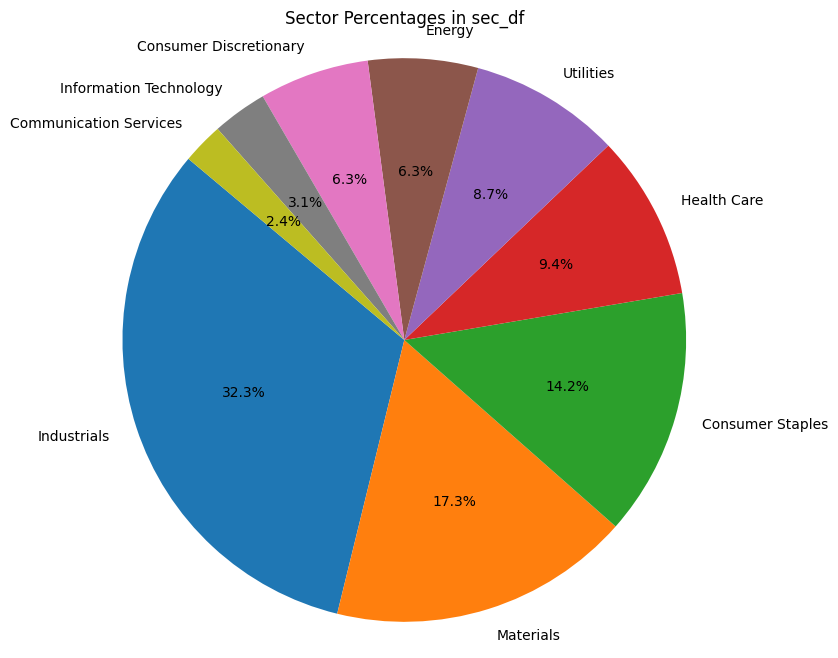

,gsector,Sector
0,10.0,Energy
1,15.0,Materials
2,20.0,Industrials
3,25.0,Consumer Discretionary
4,30.0,Consumer Staples
5,35.0,Health Care
6,45.0,Information Technology
7,50.0,Communication Services
8,55.0,Utilities


In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract unique gvkeys from sec_df
unique_keys = pd.DataFrame(sec_df['GVKEY'].unique(), columns=['gvkey'])

# Read the lookup CSV to get company names and merge with unique gvkeys
lookup = pd.read_csv('./data/lookup.csv')
unique_lookup = lookup.drop_duplicates(subset=['gvkey'])
merged = pd.merge(unique_keys, unique_lookup[['gvkey', 'conm']], on='gvkey', how='left')

# Extract gsector for each company from sec_df (assuming one unique sector per GVKEY)
gvkey_sector = sec_df.groupby('GVKEY')['gsector'].first().reset_index()
merged = pd.merge(merged, gvkey_sector, left_on='gvkey', right_on='GVKEY', how='left')
merged = merged[['gvkey', 'conm', 'gsector']]

# Read the GIC CSV to extract unique sector code and full sector name
gic_lookup = pd.read_csv('./data/gic.csv')[['Sector Code', 'Sector']].drop_duplicates()
gic_lookup.rename(columns={'Sector Code': 'gsector'}, inplace=True)
gic_lookup['gsector'] = gic_lookup['gsector'].astype(merged['gsector'].dtype)

# Merge the GIC lookup to add the full sector names to merged
merged = pd.merge(merged, gic_lookup, on='gsector', how='left')

# Display the merged DataFrame with company names and full sector names
display(merged.head())

# Plot a pie chart of the sector percentages using the full sector names
sector_counts = merged['Sector'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sector Percentages in sec_df")
plt.axis('equal')
plt.show()

# Extract unique mapping from gsector code to full sector name
unique_sector_lookup = merged[['gsector', 'Sector']].drop_duplicates().sort_values(by='gsector')
display(unique_sector_lookup.reset_index(drop=True))

In [89]:
import pandas as pd
import os
import warnings

# Silence FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Choose your resampling method for daily data:
# 'mean' for monthly average, 'first' for first available day.
resample_method = 'mean'  

# Paths (adjust if your files are elsewhere)
DATA_DIR = './data'
macro_files = {
    "AAA10Y": "AAA10Y.csv",
    "BAA10Y": "BAA10Y.csv",
    "CPI": "cpi.csv",
    "GS10": "GS10.csv",
    "IR_10Y_GOV": "ir-10-year-gov-bonds.csv",
    "T10Y3M": "T10Y3M.csv",
    "Unemployment": "unemployment.csv",
    "WorkingAgePop": "working-age-pop.csv"
}

# Dictionary to store processed macro DataFrames
macro_dfs = {}

for name, filename in macro_files.items():
    path = os.path.join(DATA_DIR, filename)
    df = pd.read_csv(path)
    
    # Force renaming: first column -> 'DATE', second column -> variable name.
    new_cols = ['DATE', name] + list(df.columns[2:])
    df.columns = new_cols
    
    # Convert DATE to datetime and drop rows with bad dates.
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    df = df.dropna(subset=['DATE'])
    
    # Set DATE as index and sort.
    df = df.set_index('DATE').sort_index()
    
    # Check if data is monthly: if every date has day==1, assume it's monthly.
    if (df.index.day == 1).all():
        # Data is monthly; ensure index is standardized to month start.
        df.index = df.index.to_period('M').to_timestamp()
    else:
        # Data is daily (or irregular). Force a daily frequency and fill missing days.
        df = df.asfreq('D')
        df = df.fillna(method='ffill')
        # Resample to monthly using the chosen method.
        if resample_method == 'mean':
            df = df.resample('M').mean()
        elif resample_method == 'first':
            df = df.resample('M').first()
        else:
            raise ValueError("Unknown resample_method: choose 'mean' or 'first'")
        # Convert index to month start.
        df.index = df.index.to_period('M').to_timestamp()
    
    # Keep only the column for this variable.
    macro_dfs[name] = df[[name]]
    
    # Debug output: print index range and count for this series.
    print(f"{name} index range: {df.index.min()} to {df.index.max()}, count: {len(df.index)}")

# Merge all macro series horizontally using pd.concat along columns.
macro_df = pd.concat(list(macro_dfs.values()), axis=1)
macro_df = macro_df.sort_index()
print("\nAfter merging macro data:")
print("macro_df shape:", macro_df.shape)
print("Unique dates in macro_df:", macro_df.index.nunique())

# --- Process Securities (Asset Returns) Data ---
sec_path = os.path.join(DATA_DIR, 'securities.csv')
sec_df = pd.read_csv(sec_path)

# Parse 'year_month' and drop bad rows.
sec_df['year_month'] = pd.to_datetime(sec_df['year_month'], errors='coerce')
sec_df = sec_df.dropna(subset=['year_month'])

# Keep only GVKEY, year_month, and trt1m (return).
sec_df = sec_df[['GVKEY', 'year_month', 'trt1m']]

# For duplicate (GVKEY, year_month) pairs, average the returns.
sec_df = sec_df.groupby(['GVKEY', 'year_month'])['trt1m'].mean().reset_index()

# Pivot to create asset returns matrix: rows = month, columns = GVKEY.
sec_ret = sec_df.pivot(index='year_month', columns='GVKEY', values='trt1m')
# Convert index to monthly frequency (forcing month start).
sec_ret.index = sec_ret.index.to_period('M').to_timestamp()
sec_ret = sec_ret.sort_index()

print("\nSecurities returns:")
print("sec_ret shape:", sec_ret.shape)
print("Unique dates in sec_ret:", sec_ret.index.nunique())

# --- Merge Macro Data and Securities Data ---
combined_df = pd.merge(macro_df, sec_ret, left_index=True, right_index=True, how='inner')
print("\nCombined DataFrame:")
print("combined_df shape:", combined_df.shape)
print("Unique dates in combined_df:", combined_df.index.nunique())


combined_df


AAA10Y index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
BAA10Y index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
CPI index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
GS10 index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
IR_10Y_GOV index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
T10Y3M index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
Unemployment index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
WorkingAgePop index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276

After merging macro data:
macro_df shape: (276, 8)
Unique dates in macro_df: 276

Securities returns:
sec_ret shape: (276, 127)
Unique dates in sec_ret: 276

Combined DataFrame:
combined_df shape: (276, 135)
Unique dates in combined_df: 276


,AAA10Y,BAA10Y,CPI,GS10,IR_10Y_GOV,T10Y3M,Unemployment,WorkingAgePop,1078,1209,...,23978,25870,28176,28940,29217,29392,29830,30477,61811,66290
DATE,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.993000,2.773333,0.632184,5.16,5.16,-0.103000,0.042,180346200,-6.9935,-7.8780,...,-13.1111,2.6106,1.8553,8.8079,-0.4808,-4.1846,13.4790,-1.6238,6.7961,7.7477
2001-02-01,2.005357,2.775357,0.399772,5.10,5.10,0.093929,0.042,180507000,9.2064,7.3603,...,-0.9591,7.7822,-3.9104,-10.6121,1.3527,10.1477,-6.8128,0.4032,5.4545,-4.6823
2001-03-01,2.091935,2.956452,0.227531,4.89,4.89,0.339032,0.043,180599100,-3.6742,-4.8335,...,-3.6089,-7.4980,6.1672,-18.5575,-0.4785,-3.4791,2.6958,5.1205,-3.8414,-14.3158
2001-04-01,2.055667,2.924333,0.397276,5.14,5.14,1.184333,0.044,180853100,-1.2715,11.9531,...,25.3233,9.7282,3.8070,17.7556,8.3077,8.1674,47.5000,3.2741,1.4493,2.3967
2001-05-01,1.892581,2.676129,0.452233,5.39,5.39,1.700645,0.043,181010700,12.0742,8.7927,...,6.5725,5.4107,4.3699,7.2850,-0.2131,-5.0714,-6.9915,3.7937,-0.3000,8.2324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.786774,1.850968,0.436716,4.17,4.17,-1.388387,0.037,208840100,-7.5721,-3.2227,...,22.1176,-0.3260,9.1388,-2.8353,-8.3126,-0.6660,-0.9162,-7.6035,-6.6102,5.8343
2023-09-01,0.746000,1.779333,0.248513,4.38,4.38,-1.194000,0.038,209000200,-5.8795,-3.4993,...,4.4709,-10.3764,-5.6729,2.8754,-16.1145,-8.8225,9.4467,-7.7525,-6.6576,23.1533
2023-10-01,0.820968,1.836129,-0.038338,4.80,4.80,-0.813871,0.039,209038200,-1.8482,-0.3387,...,4.3411,-1.0957,-1.8874,-26.5665,-18.4560,-2.5938,0.3631,-8.9180,-5.8308,-1.4324


In [90]:
print(combined_df.columns)
print(f"Time period: {combined_df.index.min()} to {combined_df.index.max()}")
#  - combined_df.iloc[:, :8] => macro data
#  - combined_df.iloc[:, 8:] => asset returns

Index([       'AAA10Y',        'BAA10Y',           'CPI',          'GS10',
          'IR_10Y_GOV',        'T10Y3M',  'Unemployment', 'WorkingAgePop',
                  1078,            1209,
       ...
                 23978,           25870,           28176,           28940,
                 29217,           29392,           29830,           30477,
                 61811,           66290],
      dtype='object', length=135)
Time period: 2001-01-01 00:00:00 to 2023-12-01 00:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import networkx as nx

def extract_B_block(A_full, num_assets, num_macro):
    """
    Extract the cross-edge block B_{am} from the full adjacency matrix.
    A_full is (num_assets+num_macro)x(num_assets+num_macro).
    The layout:
         [ A_aa     B_am ]
         [ B_ma     A_mm ]
    Returns B_am of shape (num_assets, num_macro).
    """
    B_am = A_full[:num_assets, num_assets:]

    return B_am

def compute_directional_accuracy(y_pred, y_true):
    """
    Compute directional accuracy across all stocks.
    Directional accuracy is the fraction of predictions that correctly forecast the sign of the return.
    """
    correct = np.sign(y_pred) == np.sign(y_true)
    accuracy = np.mean(correct)
    return accuracy

class GraphFactorModel:
    def __init__(self, combined_df, A_kg = None, gamma=0.1, filter_type="low"):
        """
        Parameters:
          combined_df: DataFrame with monthly data.
                       The first 8 columns are macro indicators,
                       and the remaining columns are asset returns.
                       (We will swap this around to follow the math in the paper.)
          A_kg: Optional knowledge graph of size (N+M)x(N+M). The first NxN values (top left block) 
                and last MxM values (bottom left block) must be zero.
                The top-right block, B_am (NxM) is the cross-connection matrix of shape (N, M)
                representing the PM's views (assets × macros). The bottom-left block B_ma (MxN) is the
                transpose of the top-right block (M, N). They will be used to build the A_full matrix.
                
                If none, the cross-connection matrix will be set to zero (returns are independent of macro vars)
          gamma: Parameter for the exponential spectral filter.
          filter_type: 'low' for low-pass (default) or 'high' for high-pass filtering.
        """
        self.num_macro = 8
        self.num_assets = combined_df.shape[1] - self.num_macro
        self.A_kg = A_kg
        self.gamma = gamma
        if A_kg is not None:
            self.b_am = extract_B_block(A_kg, self.num_assets, self.num_macro)
        else:
            self.b_am = None
            
        # Assert filter_type is valid
        assert filter_type in ("low", "high"), "filter_type must be 'low' or 'high'"
        self.filter_type = filter_type
        
        # Assume that the first 8 columns are macro variables and the rest are asset returns.
        self.macro_cols = combined_df.columns[:self.num_macro]
        self.asset_cols = combined_df.columns[self.num_macro:]
        # Copy and normalise macro data
        self.combined_df = combined_df.copy()
        self.normalize_macro_data()
        # Build graph-related matrices from the (normalised) data
        self.build_graph()
        # Apply graph filtering to the combined signal
        self.filter_signal()

    def normalize_macro_data(self):
        """
        Normalise macro data so that all macro series are on a comparable scale.
        For example, multiply CPI and Unemployment by 100 (like returns) and apply a robust scaler on WorkingAgePop.
        """
        for col in self.macro_cols:
            if col in ["CPI", "Unemployment"]:
                self.combined_df[col] = self.combined_df[col] * 100.0
            elif col == "WorkingAgePop":
                # Apply robust scaling: subtract median and divide by IQR.
                scaler = RobustScaler()
                self.combined_df[col] = scaler.fit_transform(self.combined_df[[col]])

    def build_graph(self):
        """
        Build the block adjacency matrix and compute the Laplacian eigen-decomposition.
        Ordering: [asset returns; macro indicators]
        """
        X_asset = self.combined_df[self.asset_cols].values   # shape: (T, N)
        X_macro = self.combined_df[self.macro_cols].values    # shape: (T, 8)
        self.T = self.combined_df.shape[0]
        self.N = X_asset.shape[1]
        self.M = X_macro.shape[1]  # should equal self.num_macro
        
        # Compute sample correlation matrices (forcing non-negative entries)
        A_aa = np.corrcoef(X_asset, rowvar=False)
        A_aa = np.maximum(A_aa, 0)
        
        A_mm = np.corrcoef(X_macro, rowvar=False)
        A_mm = np.maximum(A_mm, 0)
        
        # For cross connections, use b_am if provided; else, use zeros.
        if self.b_am is None:
            B = np.zeros((self.N, self.M))
        else:
            expected_shape = (self.N, self.M)
            assert self.b_am.shape == expected_shape, f"b_am must have shape {expected_shape} but got {self.b_am.shape}"
            B = self.b_am  # Expected shape: (N, M)
        
        # Construct full (N+M)x(N+M) block adjacency matrix.
        # Top-left: asset-asset, top-right: asset-macro, bottom-left: macro-asset, bottom-right: macro-macro.
        self.A_full = np.block([
            [A_aa, B],
            [B.T, A_mm]
        ])
        
        # Compute degree matrix and Laplacian.
        D = np.diag(self.A_full.sum(axis=1))
        self.L = D - self.A_full
        
        # Eigen-decomposition of the symmetric Laplacian.
        eigenvals, U = eigh(self.L)
        self.eigenvals = eigenvals
        self.U = U
        
        # Build the combined signal (assets then macros).
        self.X_asset = X_asset         # Original asset returns
        self.X_macro = X_macro
        self.X_combined = np.hstack([X_asset, X_macro])
    
    def filter_signal(self):
        """
        Apply graph filtering to the combined signal.
        Uses a spectral filter:
          If filter_type is "low": h(λ)=exp(-gamma*λ)
          If filter_type is "high": h(λ)=1-exp(-gamma*λ)
        """
        if self.filter_type == "low":
            h = np.exp(-self.gamma * self.eigenvals)
        else:  # high-pass filter
            h = 1 - np.exp(-self.gamma * self.eigenvals)
        self.h = h
        T, NM = self.X_combined.shape
        X_filtered = np.zeros_like(self.X_combined)
        for t in range(T):
            x_t = self.X_combined[t, :]
            x_t_hat = self.U.T @ x_t       # Graph Fourier Transform
            x_t_hat_filtered = h * x_t_hat  # Apply spectral filter elementwise
            x_t_filtered = self.U @ x_t_hat_filtered  # Inverse GFT
            X_filtered[t, :] = x_t_filtered
        self.X_filtered = X_filtered
        # Extract filtered asset returns (first N columns).
        self.R_filtered = X_filtered[:, :self.N]

    def plot_covariances(self):
        """
        Visualise the covariance matrices (heatmaps) of asset returns before and after filtering.
        Tick labels are omitted to speed up plotting.
        """
        cov_original = np.cov(self.X_combined[:, :self.N].T)
        cov_filtered = np.cov(self.X_filtered[:, :self.N].T)
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im0 = axs[0].imshow(cov_original, cmap='viridis', interpolation='nearest')
        axs[0].set_title("Original Covariance")
        fig.colorbar(im0, ax=axs[0])
        
        im1 = axs[1].imshow(cov_filtered, cmap='viridis', interpolation='nearest')
        axs[1].set_title("Filtered Covariance")
        fig.colorbar(im1, ax=axs[1])
        
        plt.tight_layout()
        plt.show()

    def fit_training(self, use_kg=True):
        """
        Fit a lag-1 autoregressive linear model.
        If use_kg is True, use the filtered asset returns (with KG).
        If use_kg is False, use the original asset returns.
        Uses returns at time t to predict returns at time t+1.
        """
        if use_kg:
            kg_status = "with KG"
            R = self.R_filtered
        else:
            kg_status = "without KG"
            R = self.X_asset

        print("==" * 30)
        print(f"Fitting to Training Data (Entire Data) {kg_status}")
        
        X_train = R[:-1, :]
        y_train = R[1:, :]

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        mse = np.mean((y_train - y_pred) ** 2)
        acc = compute_directional_accuracy(y_pred, y_train)
        kg_str = "filtered" if use_kg else "original"
        print(f"Training MSE ({kg_str}):", mse)
        print(f"Directional Accuracy ({kg_str} training): {acc*100:.2f}%")
        return mse, model, y_pred, y_train

    def predict_rolling(self, window_size=60, use_kg=True):
        """
        Perform rolling-window forecast to predict next time step returns.
        If use_kg is True, use the filtered asset returns (with KG); otherwise, use the original asset returns.
        """
        if use_kg:
            R = self.R_filtered
            kg_status = "with KG"
        else:
            R = self.X_asset
            kg_status = "without KG"
        print("==" * 30)
        print(f"Predicting Returns (Rolling Window) {kg_status}")

        preds = []
        true_vals = []
        for t in range(window_size, self.T - 1):
            train_X = R[t-window_size:t, :]
            train_y = R[t-window_size+1:t+1, :]
            model = LinearRegression()
            model.fit(train_X, train_y)
            pred = model.predict(R[t, :].reshape(1, -1))
            preds.append(pred.flatten())
            true_vals.append(R[t+1, :])
        preds = np.array(preds)
        true_vals = np.array(true_vals)
        mse = np.mean((true_vals - preds) ** 2)
        acc = compute_directional_accuracy(preds, true_vals)
        kg_str = "filtered" if use_kg else "original"
        print(f"Rolling-window MSE ({kg_str}):", mse)
        print(f"Directional Accuracy ({kg_str} rolling): {acc*100:.2f}%")
        return mse, preds, true_vals
    
    def plot_adjacencies_graph(self):
        """
        Plot the full adjacency matrix, the kg adjacency matrix, and graph visualisation.
        """
        # Build a graph from the KG adjacency matrix.
        G = nx.from_numpy_array(self.A_kg)
        
        # Remove self-loop edges.
        G.remove_edges_from(list(nx.selfloop_edges(G)))
        
        # Remove orphan nodes (nodes with no edges).
        orphan_nodes = [n for n, d in G.degree() if d == 0]
        G.remove_nodes_from(orphan_nodes)
        
        # Set colors: asset nodes (indices < self.N) as skyblue, macro nodes as red.
        node_colors = ["skyblue" if node < self.N else "red" for node in G.nodes()]
        
        # Use spring layout for positioning.
        pos = nx.spring_layout(G, seed=42)
        
        # Figure 1: Side by side plots.
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        # Left: KG Adjacency matrix heatmap.
        im = axs[0].imshow(self.A_kg, cmap='viridis', interpolation='nearest')
        axs[0].set_title(r"KG Adjacency Matrix $A = \begin{pmatrix} 0 & B_{am} \\ B_{ma} & 0 \end{pmatrix}$")
        fig.colorbar(im, ax=axs[0], shrink=0.8, pad=0.02)
        
        # Right: Full Adjacency matrix heatmap.
        im = axs[1].imshow(self.A_full, cmap='viridis', interpolation='nearest')
        axs[1].set_title(r"Full Adj. Matrix $\mathcal{A} = \begin{pmatrix} A_{aa} & B_{am} \\ B_{ma} & A_{mm} \end{pmatrix} = \begin{pmatrix} \text{Cov(Asset Returns)} & B_{am} \\ B_{ma} & \text{Cov(Macro Vars)} \end{pmatrix}$")
        fig.colorbar(im, ax=axs[1], shrink=0.8, pad=0.02)
        
        
        plt.tight_layout()
        plt.show()
        
        # Figure 2: Graph only.
        plt.figure(figsize=(7, 4))
        plt.title("Graph Visualisation (blue: asset, red: macro)")
        nx.draw(G, pos, node_color=node_colors, with_labels=True)
        plt.tight_layout()
        plt.show()


def build_kg_adj_matrix(merged, macro_cols, sector_macro_dict):
    """
    Build a block adjacency matrix that encodes:
      - Asset-asset connections (based on same sector).
      - Macro-macro connections (set to 0 for simplicity).
      - Asset-macro connections (based on the PM's sector-based views).

    Parameters
    ----------
    merged : DataFrame
        Columns: ['gvkey', 'conm', 'gsector', 'Sector'].
    macro_cols : list of str
        Names of the macro variables, e.g. ['AAA10Y','BAA10Y',...].
    sector_macro_dict : dict
        Dictionary that maps sector codes (or names) to a dict of {macro_var: weight}.

    Returns
    -------
    A_full : np.ndarray, shape (N+M, N+M)
        The (N+M)x(N+M) adjacency matrix.
    labels : list of str
        Labels for each row/column in A_full (first assets, then macros).
    """
    # 1) Identify all unique assets
    asset_info = merged[["gvkey", "gsector"]].drop_duplicates().reset_index(drop=True)
    asset_info["gvkey"] = asset_info["gvkey"].astype(
        str
    )  # ensure string type for labelling
    N = len(asset_info)
    M = len(macro_cols)

    # 2) Build an index mapping for assets and macros.
    # New ordering: assets first, then macros.
    asset_index = {asset_info["gvkey"][i]: i for i in range(N)}
    macro_index = {macro: N + i for i, macro in enumerate(macro_cols)}

    # 3) Initialise adjacency matrix.
    A_full = np.zeros((N + M, N + M))

    # 4) Macro–Macro block (A_mm): set to zero or add your own logic.
    # 5) Asset–Asset block (A_aa): set to 0 (or add your own weighting based on sector similarity).
    # 6) Asset–Macro cross edges (B_am): read from sector_macro_dict.
    for i in range(N):
        gv_i = asset_info["gvkey"][i]
        sector_i = asset_info["gsector"][i]
        if sector_i in sector_macro_dict:
            macro_weights = sector_macro_dict[
                sector_i
            ]  # e.g. {'CPI': 0.5, 'IR_10Y_GOV': 0.7}
            for macro_var, w in macro_weights.items():
                if macro_var in macro_index:
                    asset_row = asset_index[gv_i]
                    macro_col = macro_index[macro_var]
                    A_full[asset_row, macro_col] = w
                    A_full[macro_col, asset_row] = w

    # 7) Build labels for rows/cols (first assets, then macros)
    labels = list(asset_info["gvkey"]) + macro_cols
    return A_full, labels



In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import networkx as nx


def extract_B_block(A_full, num_assets, num_macro):
    """
    Extract the cross-edge block B_{am} from the full adjacency matrix.
    A_full is (num_assets+num_macro)x(num_assets+num_macro).
    The layout:
         [ A_aa     B_am ]
         [ B_ma     A_mm ]
    Returns B_am of shape (num_assets, num_macro).
    """
    B_am = A_full[:num_assets, num_assets:]
    return B_am


def compute_directional_accuracy(y_pred, y_true):
    """
    Compute directional accuracy across all stocks.
    Directional accuracy is the fraction of predictions that correctly forecast the sign of the return.
    """
    correct = np.sign(y_pred) == np.sign(y_true)
    accuracy = np.mean(correct)
    return accuracy



class GraphFactorModel:
    def __init__(self, combined_df, A_kg=None, gamma=0.1, filter_type="low"):
        """
        Parameters:
          combined_df: DataFrame with monthly data.
                       The first 8 columns are macro indicators,
                       and the remaining columns are asset returns.
          A_kg: Optional knowledge graph of size (N+M)x(N+M). The first NxN values (top left block)
                and last MxM values (bottom left block) must be zero.
                The top-right block, B_am (NxM), represents the PM's views.
                If None, the cross-connection matrix will be set to zero.
          gamma: Parameter for the exponential spectral filter.
          filter_type: 'low' for low-pass (default) or 'high' for high-pass filtering.
        """
        self.num_macro = 8
        self.num_assets = combined_df.shape[1] - self.num_macro
        self.A_kg = A_kg
        self.gamma = gamma
        if A_kg is not None:
            self.b_am = self.extract_B_block(A_kg, self.num_assets, self.num_macro)
        else:
            self.b_am = None

        # Assert filter_type is valid.
        assert filter_type in ("low", "high"), "filter_type must be 'low' or 'high'"
        self.filter_type = filter_type

        # Assume the first 8 columns are macro variables and the rest are asset returns.
        self.macro_cols = combined_df.columns[:self.num_macro]
        self.asset_cols = combined_df.columns[self.num_macro:]
        # Copy and normalise macro data.
        self.combined_df = combined_df.copy()
        self.normalize_macro_data()
        # Build graph-related matrices on the full dataset (for plotting).
        self.build_graph()
        # Compute global filtering on full data (for plotting only).
        self.filter_signal()

    @staticmethod
    def extract_B_block(A_full, num_assets, num_macro):
        """
        Extract the cross-edge block B_{am} from the full adjacency matrix.
        Returns B_am of shape (num_assets, num_macro).
        """
        return A_full[:num_assets, num_assets:]

    def normalize_macro_data(self):
        """
        Normalise macro data so that all series are on a comparable scale.
        For example, multiply CPI and Unemployment by 100 and robust-scale WorkingAgePop.
        """
        for col in self.macro_cols:
            if col in ["CPI", "Unemployment"]:
                self.combined_df[col] = self.combined_df[col] * 100.0
            elif col == "WorkingAgePop":
                scaler = RobustScaler()
                self.combined_df[col] = scaler.fit_transform(self.combined_df[[col]])

    def build_graph(self):
        """
        Build the block adjacency matrix and compute the Laplacian eigen-decomposition
        using the full dataset.
        Ordering: [asset returns; macro indicators]
        """
        X_asset = self.combined_df[self.asset_cols].values  # shape: (T, N)
        X_macro = self.combined_df[self.macro_cols].values   # shape: (T, 8)
        self.T = self.combined_df.shape[0]
        self.N = X_asset.shape[1]
        self.M = X_macro.shape[1]

        # Compute sample correlation matrices.
        A_aa = np.corrcoef(X_asset, rowvar=False)
        A_aa = np.maximum(A_aa, 0)
        A_mm = np.corrcoef(X_macro, rowvar=False)
        A_mm = np.maximum(A_mm, 0)

        # For cross connections, use self.b_am if provided; otherwise, zeros.
        if self.b_am is None:
            B = np.zeros((self.N, self.M))
        else:
            B = self.b_am

        self.A_full = np.block([[A_aa, B], [B.T, A_mm]])
        D = np.diag(self.A_full.sum(axis=1))
        self.L = D - self.A_full
        eigenvals, U = eigh(self.L)
        self.eigenvals = eigenvals
        self.U = U

        self.X_asset = X_asset
        self.X_macro = X_macro
        self.X_combined = np.hstack([X_asset, X_macro])

    def filter_signal(self):
        """
        Apply graph filtering to the combined signal (full dataset) for plotting.
        """
        if self.filter_type == "low":
            h = np.exp(-self.gamma * self.eigenvals)
        else:
            h = 1 - np.exp(-self.gamma * self.eigenvals)
        self.h = h
        T, NM = self.X_combined.shape
        X_filtered = np.zeros_like(self.X_combined)
        for t in range(T):
            x_t = self.X_combined[t, :]
            x_t_hat = self.U.T @ x_t
            x_t_hat_filtered = h * x_t_hat
            x_t_filtered = self.U @ x_t_hat_filtered
            X_filtered[t, :] = x_t_filtered
        self.X_filtered = X_filtered
        self.R_filtered = X_filtered[:, :self.N]

    def filter_window_range(self, df_window):
        """
        Filter the combined signal for a specific window of data (df_window).
        Computes the correlation matrices, builds the adjacency matrix, and applies the spectral filter
        using only data in the window. Returns the filtered asset returns for the window.
        """
        X_asset = df_window[self.asset_cols].values
        X_macro = df_window[self.macro_cols].values
        A_aa = np.corrcoef(X_asset, rowvar=False)
        A_aa = np.maximum(A_aa, 0)
        A_mm = np.corrcoef(X_macro, rowvar=False)
        A_mm = np.maximum(A_mm, 0)

        if self.b_am is None:
            B = np.zeros((self.num_assets, self.num_macro))
        else:
            B = self.b_am

        A_full = np.block([[A_aa, B], [B.T, A_mm]])
        D = np.diag(A_full.sum(axis=1))
        L = D - A_full
        eigenvals, U = eigh(L)
        if self.filter_type == "low":
            h = np.exp(-self.gamma * eigenvals)
        else:
            h = 1 - np.exp(-self.gamma * eigenvals)
        X_combined = np.hstack([X_asset, X_macro])
        T_window = X_combined.shape[0]
        X_filtered = np.zeros_like(X_combined)
        for i in range(T_window):
            x = X_combined[i, :]
            x_hat = U.T @ x
            x_hat_filtered = h * x_hat
            x_filtered = U @ x_hat_filtered
            X_filtered[i, :] = x_filtered
        R_filtered = X_filtered[:, :self.num_assets]
        return R_filtered

    def plot_covariances(self):
        """
        Plot covariance heatmaps for asset returns before and after filtering,
        computed on the full dataset.
        """
        cov_original = np.cov(self.X_combined[:, :self.N].T)
        cov_filtered = np.cov(self.X_filtered[:, :self.N].T)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im0 = axs[0].imshow(cov_original, cmap="viridis", interpolation="nearest")
        axs[0].set_title("Original Covariance (Full Data)")
        fig.colorbar(im0, ax=axs[0])
        im1 = axs[1].imshow(cov_filtered, cmap="viridis", interpolation="nearest")
        axs[1].set_title("Filtered Covariance (Full Data)")
        fig.colorbar(im1, ax=axs[1])
        plt.tight_layout()
        plt.show()

    def plot_correlations(self):
        """
        Plot correlation heatmaps for asset returns before and after filtering,
        computed on the full dataset.
        """
        corr_original = np.corrcoef(self.X_combined[:, :self.N].T)
        corr_filtered = np.corrcoef(self.X_filtered[:, :self.N].T)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im0 = axs[0].imshow(corr_original, cmap="viridis", interpolation="nearest")
        axs[0].set_title("Original Correlations (Full Data)")
        fig.colorbar(im0, ax=axs[0])
        im1 = axs[1].imshow(corr_filtered, cmap="viridis", interpolation="nearest")
        axs[1].set_title("Filtered Correlations (Full Data)")
        fig.colorbar(im1, ax=axs[1])
        plt.tight_layout()
        plt.show()

    def fit_training(self, use_kg=True):
        """
        Fit a lag-1 autoregressive model on the full dataset.
        If use_kg is True, use the globally filtered asset returns;
        otherwise, use the original asset returns.
        """
        if use_kg:
            kg_status = "with KG"
            R = self.R_filtered
        else:
            kg_status = "without KG"
            R = self.X_asset
        print("==" * 30)
        print(f"Fitting to Training Data (Entire Data) {kg_status}")
        X_train = R[:-1, :]
        y_train = R[1:, :]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        mse = np.mean((y_train - y_pred) ** 2)
        acc = compute_directional_accuracy(y_pred, y_train)
        kg_str = "filtered" if use_kg else "original"
        print(f"Training MSE ({kg_str}):", mse)
        print(f"Directional Accuracy ({kg_str} training): {acc*100:.2f}%")
        return mse, model, y_pred, y_train

    def predict_rolling(self, window_size=60, use_kg=True):
        """
        Perform a rolling-window forecast to predict next-period returns.
        
        When use_kg is True, for each window the filtered asset returns are computed using only historical data
        (via filter_window_range) to form predictors and targets.
        When use_kg is False, the raw asset returns (from self.combined_df) are used directly.
        """
        preds = []
        true_vals = []
        for t in range(window_size, self.T - 1):
            if use_kg:
                # Use filtered returns computed on the window.
                train_df = self.combined_df.iloc[t - window_size : t]
                filtered_train = self.filter_window_range(train_df)
                train_X = filtered_train[:-1, :]
                train_y = filtered_train[1:, :]
                model = LinearRegression()
                model.fit(train_X, train_y)
                predictor = filtered_train[-1, :]
                test_df = self.combined_df.iloc[t - window_size + 1 : t + 1]
                filtered_test = self.filter_window_range(test_df)
                target = filtered_test[-1, :]
                pred = model.predict(predictor.reshape(1, -1))
            else:
                # Use raw asset returns from self.combined_df.
                raw = self.combined_df[self.asset_cols].values
                train_X = raw[t - window_size : t, :]
                train_y = raw[t - window_size + 1 : t + 1, :]
                model = LinearRegression()
                model.fit(train_X, train_y)
                predictor = raw[t, :]
                target = raw[t + 1, :]
                pred = model.predict(predictor.reshape(1, -1))
            preds.append(pred.flatten())
            true_vals.append(target)
        preds = np.array(preds)
        true_vals = np.array(true_vals)
        mse = np.mean((true_vals - preds) ** 2)
        acc = compute_directional_accuracy(preds, true_vals)
        kg_str = "filtered" if use_kg else "original"
        print("==" * 30)
        print(f"Rolling-window MSE ({kg_str}):", mse)
        print(f"Directional Accuracy ({kg_str} rolling): {acc*100:.2f}%")
        return mse, preds, true_vals

    def plot_adjacencies_graph(self):
        """
        Plot the KG and full adjacency matrices and display a graph visualisation.
        Computations are done on the full dataset.
        """
        G = nx.from_numpy_array(self.A_kg)
        G.remove_edges_from(list(nx.selfloop_edges(G)))
        orphan_nodes = [n for n, d in G.degree() if d == 0]
        G.remove_nodes_from(orphan_nodes)
        node_colors = ["skyblue" if node < self.N else "red" for node in G.nodes()]
        pos = nx.spring_layout(G, seed=42)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        im = axs[0].imshow(self.A_kg, cmap="viridis", interpolation="nearest")
        axs[0].set_title(r"KG Adjacency Matrix $A = \begin{pmatrix} 0 & B_{am} \\ B_{ma} & 0 \end{pmatrix}$")
        fig.colorbar(im, ax=axs[0], shrink=0.8, pad=0.02)
        im = axs[1].imshow(self.A_full, cmap="viridis", interpolation="nearest")
        axs[1].set_title(r"Full Adj. Matrix $\mathcal{A} = \begin{pmatrix} A_{aa} & B_{am} \\ B_{ma} & A_{mm} \end{pmatrix}$")
        fig.colorbar(im, ax=axs[1], shrink=0.8, pad=0.02)
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(7, 4))
        plt.title("Graph Visualisation (blue: asset, red: macro)")
        nx.draw(G, pos, node_color=node_colors, with_labels=True)
        plt.tight_layout()
        plt.show()



def build_kg_adj_matrix(merged, macro_cols, sector_macro_dict):
    """
    Build a block adjacency matrix that encodes:
      - Asset-asset connections (based on same sector).
      - Macro-macro connections (set to 0 for simplicity).
      - Asset-macro connections (based on the PM's sector-based views).

    Parameters
    ----------
    merged : DataFrame
        Columns: ['gvkey', 'conm', 'gsector', 'Sector'].
    macro_cols : list of str
        Names of the macro variables, e.g. ['AAA10Y','BAA10Y',...].
    sector_macro_dict : dict
        Dictionary that maps sector codes (or names) to a dict of {macro_var: weight}.

    Returns
    -------
    A_full : np.ndarray, shape (N+M, N+M)
        The (N+M)x(N+M) adjacency matrix.
    labels : list of str
        Labels for each row/column in A_full (first assets, then macros).
    """
    # 1) Identify all unique assets
    asset_info = merged[["gvkey", "gsector"]].drop_duplicates().reset_index(drop=True)
    asset_info["gvkey"] = asset_info["gvkey"].astype(str)
    N = len(asset_info)
    M = len(macro_cols)

    # 2) Build an index mapping for assets and macros.
    asset_index = {asset_info["gvkey"][i]: i for i in range(N)}
    macro_index = {macro: N + i for i, macro in enumerate(macro_cols)}

    # 3) Initialise adjacency matrix.
    A_full = np.zeros((N + M, N + M))

    # 4) Macro–Macro block (A_mm): set to zero.
    # 5) Asset–Asset block (A_aa): set to 0 (or add your own weighting based on sector similarity).
    # 6) Asset–Macro cross edges (B_am): read from sector_macro_dict.
    for i in range(N):
        gv_i = asset_info["gvkey"][i]
        sector_i = asset_info["gsector"][i]
        if sector_i in sector_macro_dict:
            macro_weights = sector_macro_dict[
                sector_i
            ]  # e.g. {'CPI': 0.5, 'IR_10Y_GOV': 0.7}
            for macro_var, w in macro_weights.items():
                if macro_var in macro_index:
                    asset_row = asset_index[gv_i]
                    macro_col = macro_index[macro_var]
                    A_full[asset_row, macro_col] = w
                    A_full[macro_col, asset_row] = w

    # 7) Build labels for rows/cols (first assets, then macros)
    labels = list(asset_info["gvkey"]) + macro_cols
    return A_full, labels

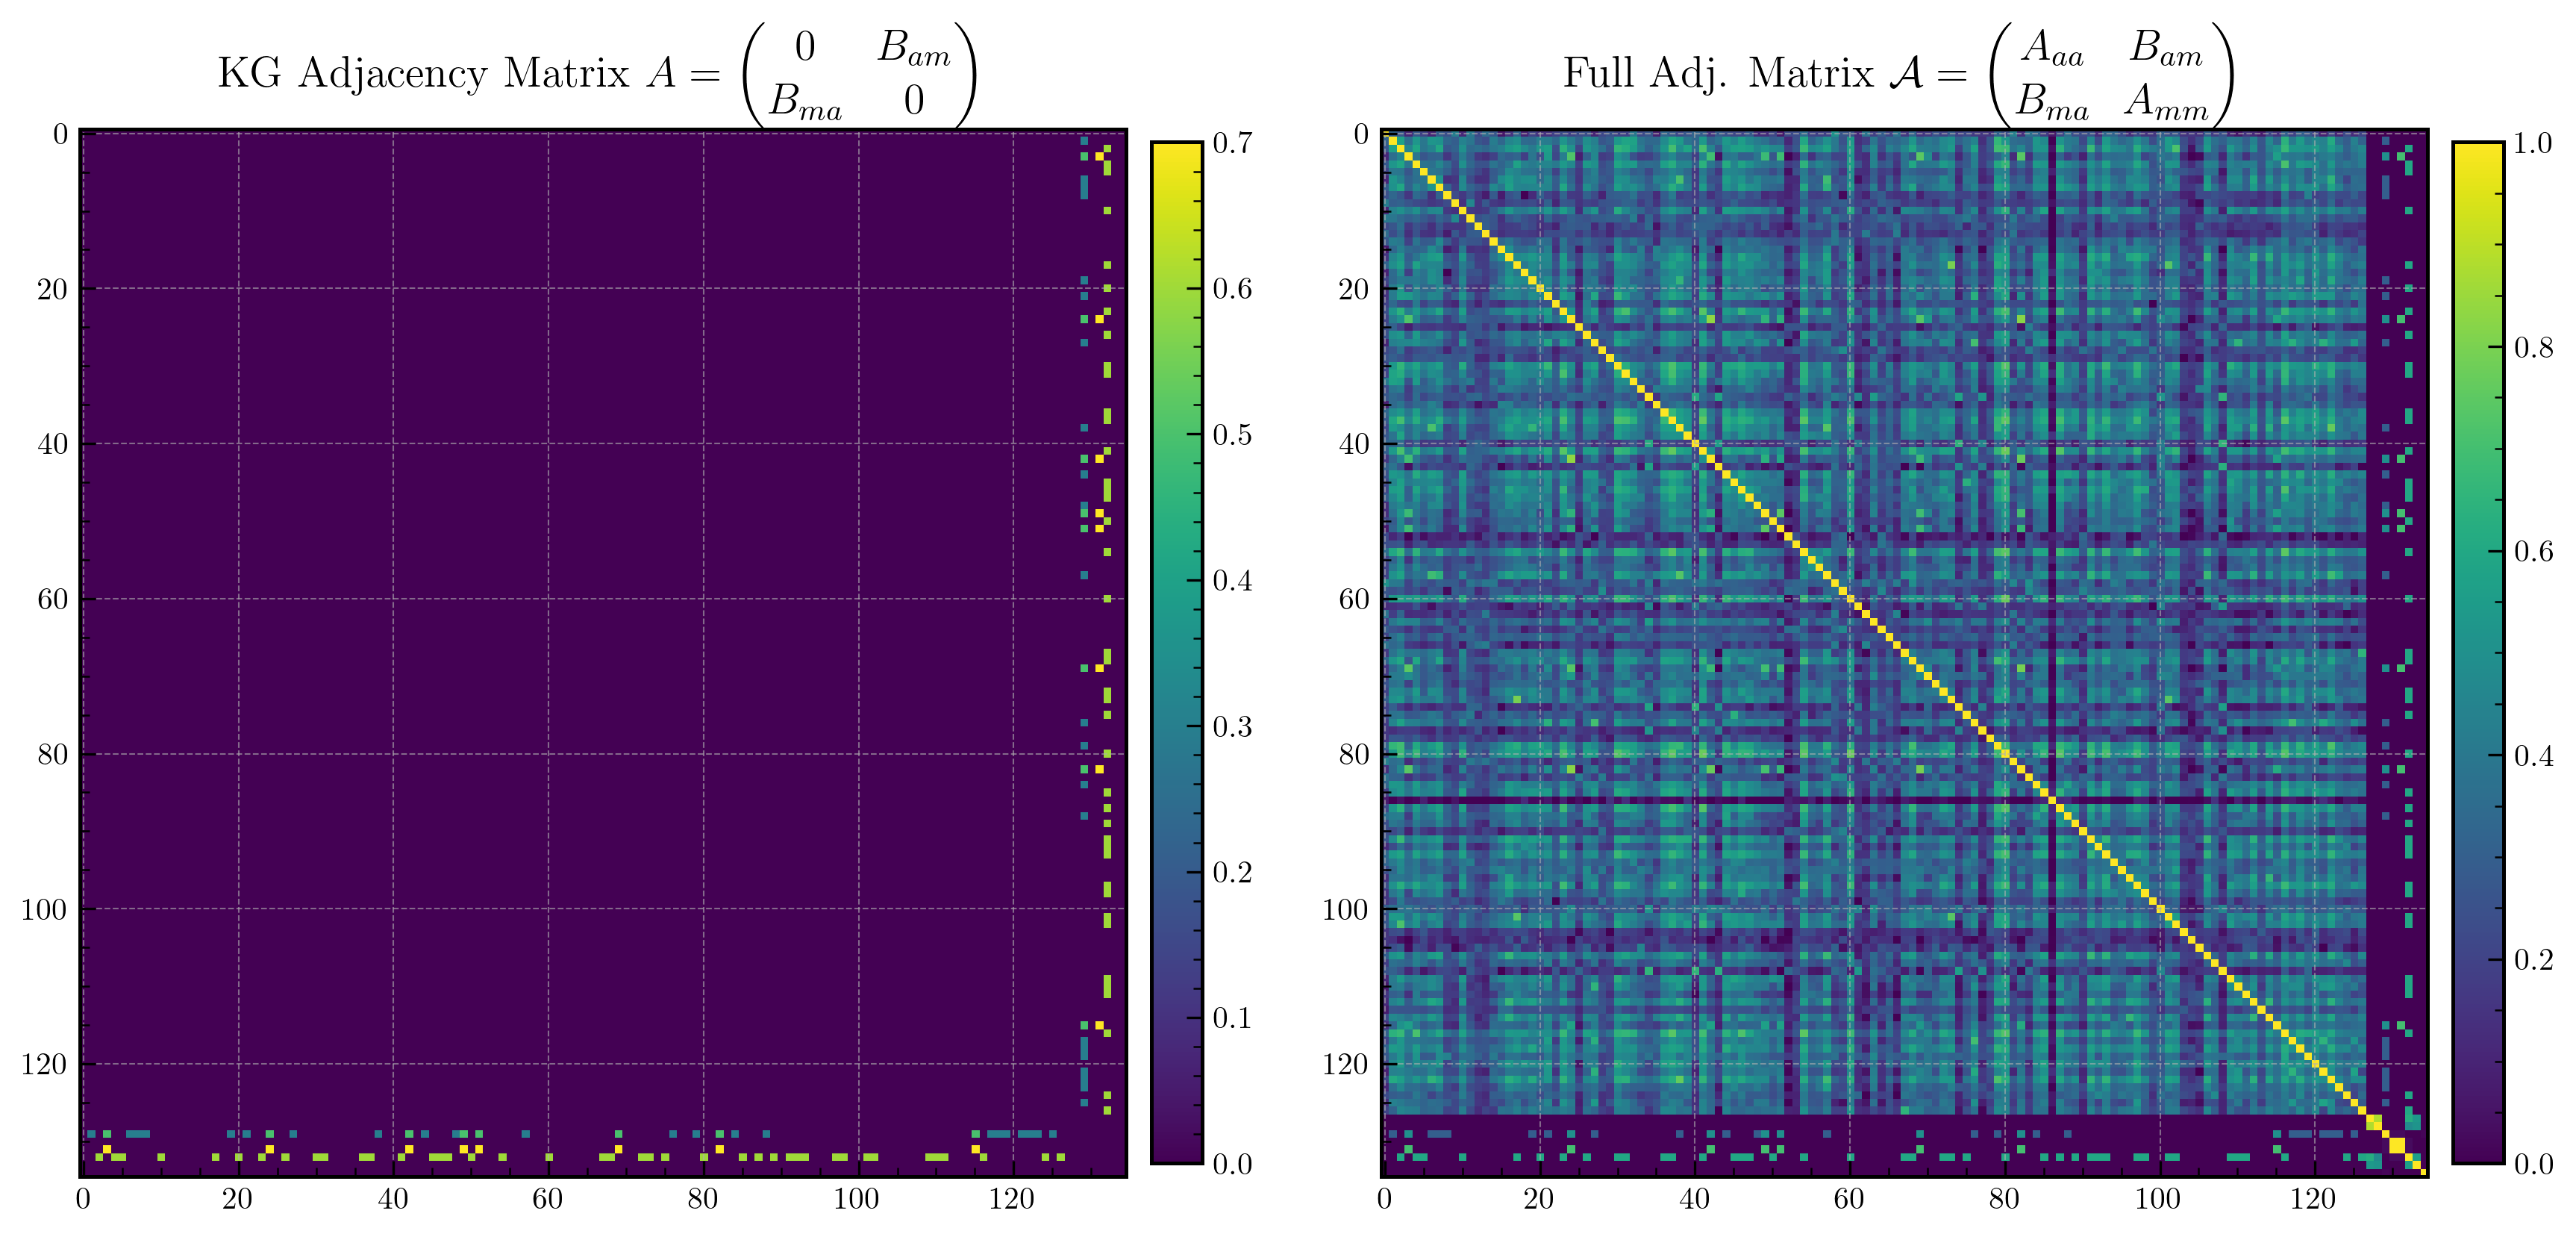

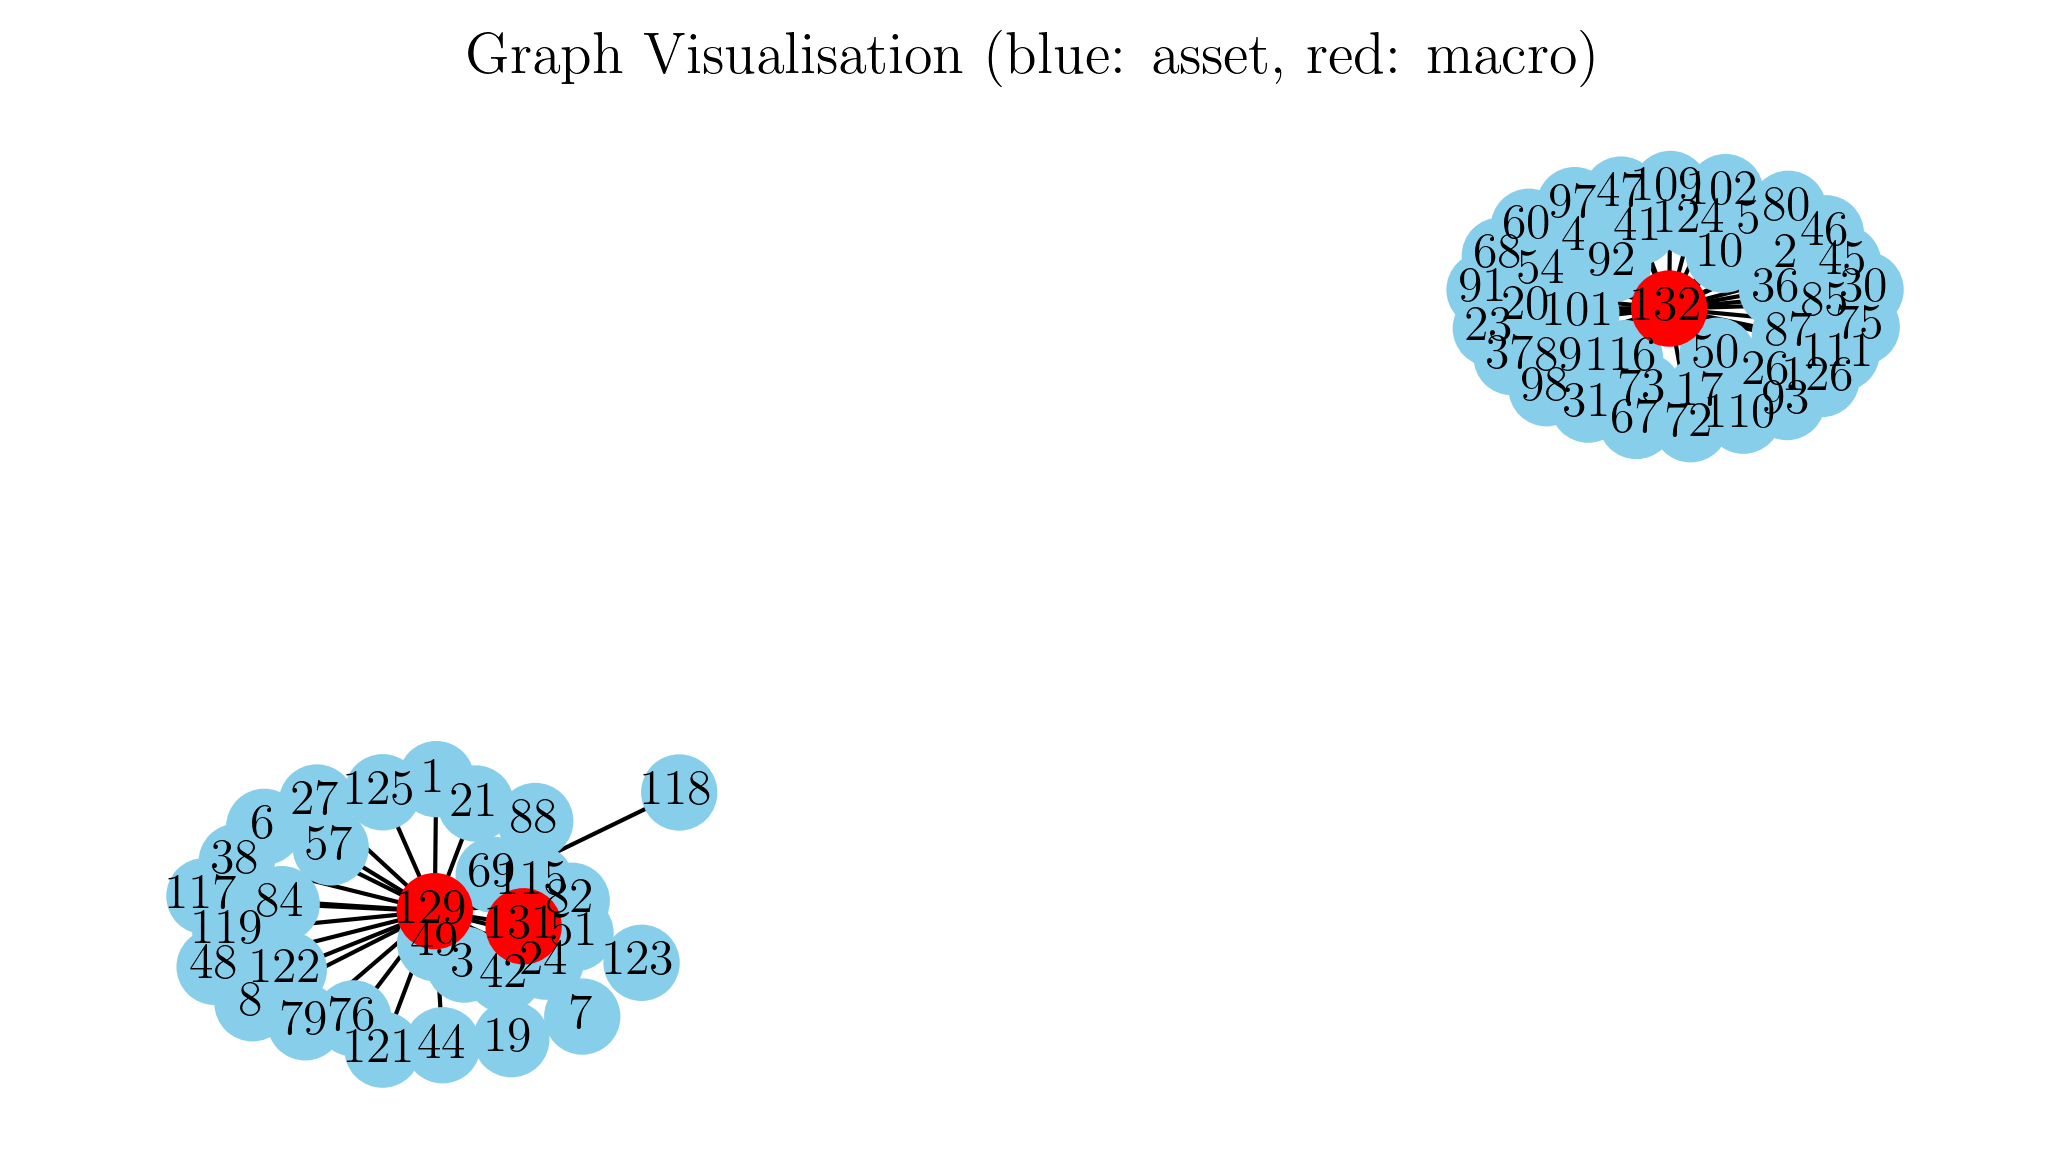

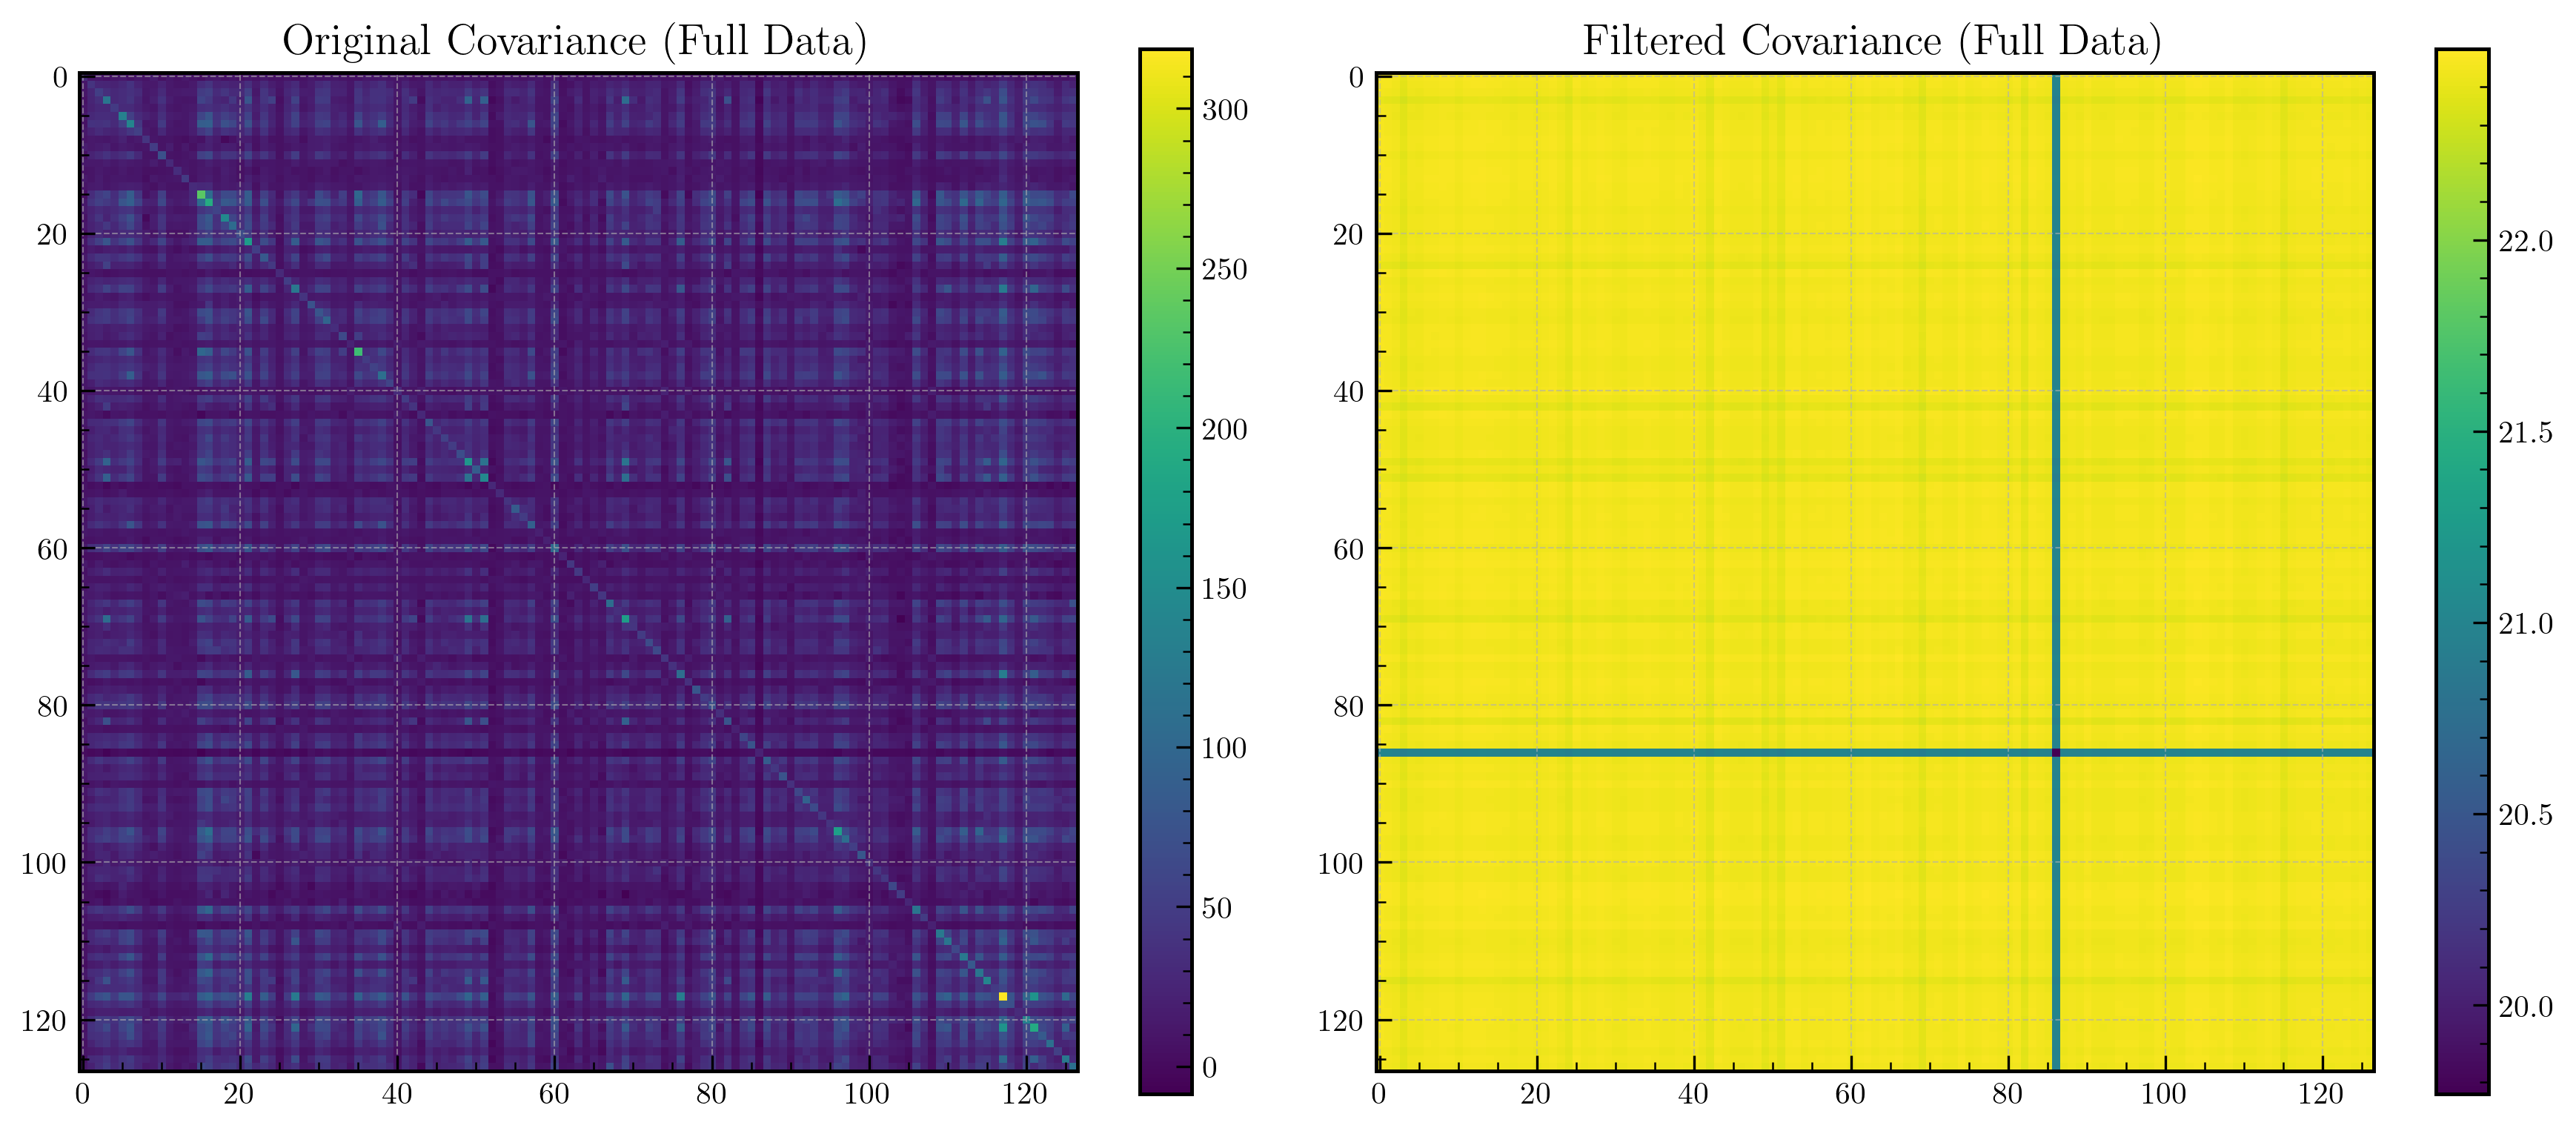

Fitting to Training Data (Entire Data) without KG
Training MSE (original): 36.35348510823172
Directional Accuracy (original training): 72.55%
Fitting to Training Data (Entire Data) with KG
Training MSE (filtered): 10.60034106351938
Directional Accuracy (filtered training): 79.63%
Rolling-window MSE (original): 116.24217321449933
Directional Accuracy (original rolling): 50.34%
Rolling-window MSE (filtered): 2238.222043359352
Directional Accuracy (filtered rolling): 51.75%


In [227]:
# Example sector -> macro weights
sector_macro_dict_example = {
    10.0: {'IR_10Y_GOV': 0.7, 'CPI': 0.5},
    15.0: {'CPI': 0.3},
    20.0: {'T10Y3M': 0.6},
    # add more as desired
}

macro_cols = [
    'AAA10Y', 'BAA10Y', 'CPI', 'GS10',
    'IR_10Y_GOV', 'T10Y3M', 'Unemployment', 'WorkingAgePop'
]

# Build the KG adjacency matrix using your provided function.
A_kg, kg_labels = build_kg_adj_matrix(
    merged=merged,
    macro_cols=macro_cols,
    sector_macro_dict=sector_macro_dict_example
)

# Now instantiate the GraphFactorModel 
model = GraphFactorModel(combined_df=combined_df, A_kg = A_kg, gamma=0.5)
model.plot_adjacencies_graph()
model.plot_covariances()

# Training MSE with original asset returns (without KG)
mse_train_orig, _, _, _ = model.fit_training(use_kg=False)

# Training MSE with filtered asset returns (with KG)
mse_train_filt, _, _, _ = model.fit_training(use_kg=True)

# Rolling-window forecast MSE with original asset returns (without KG)
mse_roll_orig, _, _ = model.predict_rolling(window_size=20, use_kg=False)

# Rolling-window forecast MSE with filtered asset returns (with KG)
mse_roll_filt, _, _ = model.predict_rolling(window_size=20, use_kg=True)

